In [1]:
import cv2
import numpy as np
import math
import utils
from plyfile import PlyData, PlyElement
import subprocess
import matplotlib.pyplot as plt
import os
import json
import statistics
%matplotlib notebook
pi = 3.14159265
size0 = 1024
maxdisp = 192

In [104]:
def colorextractor (im):
    res = np.zeros((24,18))
    i = 0
    for iy in range(0,4):
        for ix in range(0,6):
            x = 50 + 100*ix
            y = 50 + 100*iy
            patch = im[(y-10):(y+10),(x-10):(x+10),:]
            r = np.mean(patch[:,:,0])
            g = np.mean(patch[:,:,1])
            b = np.mean(patch[:,:,2])
            res[i, 0] = r
            res[i, 1] = g
            res[i, 2] = b
            res[i, 3] = r**2
            res[i, 4] = g**2
            res[i, 5] = b**2
            res[i, 6] = r*g
            res[i, 7] = r*b
            res[i, 8] = b*g
            res[i, 9] = r**3
            res[i, 10] = g**3
            res[i, 11] = b**3
            res[i, 12] = (r**2)*g
            res[i, 13] = r*(g**2)
            res[i, 14] = (r**2)*b
            res[i, 15] = r*(b**2)
            res[i, 16] = (b**2)*g
            res[i, 17] = b*(g**2)  
            i += 1
    return res

In [239]:
left = cv2.imread('26.05/for_rectification/color_calib_crop/left.png')
right = cv2.imread('26.05/for_rectification/color_calib_crop/right.png')
top = cv2.imread('26.05/for_rectification/color_calib_crop/top.png')
left = cv2.resize(left, (600,400))
right = cv2.resize(right, (600,400))
top = cv2.resize(top, (600,400))

In [106]:
resl = colorextractor(left)
resr = colorextractor(right)
rest = colorextractor(top)

In [123]:
ar = np.zeros((3,18))
ar[0,:] = np.dot(np.dot(np.linalg.inv(np.dot(resr.T,resr)),resr.T),resl[:,0])
ar[1,:] = np.dot(np.dot(np.linalg.inv(np.dot(resr.T,resr)),resr.T),resl[:,1])
ar[2,:] = np.dot(np.dot(np.linalg.inv(np.dot(resr.T,resr)),resr.T),resl[:,2])

In [124]:
at = np.zeros((3,18))
at[0,:] = np.dot(np.dot(np.linalg.inv(np.dot(rest.T,rest)),rest.T),resl[:,0])
at[1,:] = np.dot(np.dot(np.linalg.inv(np.dot(rest.T,rest)),rest.T),resl[:,1])
at[2,:] = np.dot(np.dot(np.linalg.inv(np.dot(rest.T,rest)),rest.T),resl[:,2])

In [161]:
vec[:]

array([    204,     159,      76,   41616,   25281,    5776,   32436,
         15504,   12084, 8489664, 4019679,  438976, 6616944, 5157324,
       3162816, 1178304,  918384, 1921356])

In [230]:
rest[:,0:3]

array([[ 15.4425,  11.6825,   9.6125],
       [ 37.315 ,  34.055 ,  25.6475],
       [118.86  , 107.765 ,  74.935 ],
       [224.6125, 203.775 , 140.09  ],
       [254.525 , 254.9075, 197.135 ],
       [254.6925, 254.7025, 248.3875],
       [236.0475, 130.24  ,  38.9675],
       [207.96  , 143.475 , 222.5275],
       [174.995 , 254.8175, 224.1775],
       [ 69.8525, 101.81  , 205.8925],
       [114.2125, 174.435 ,  61.56  ],
       [148.12  ,  52.6   ,  22.5025],
       [134.66  , 206.695 , 212.14  ],
       [163.9575, 254.86  , 141.345 ],
       [ 78.6925,  38.2775,  35.42  ],
       [ 67.4125,  97.0275, 196.0475],
       [224.495 ,  79.165 ,  31.9975],
       [105.1425, 157.695 , 207.8875],
       [247.6675, 226.8125,  73.28  ],
       [254.31  , 145.815 ,  92.915 ],
       [ 60.89  ,  87.015 ,  32.485 ],
       [193.5675, 101.795 ,  31.3825],
       [140.1875, 178.06  , 200.325 ],
       [ 47.1775,  60.2425,  82.3525]])

In [159]:
r*g

32436

In [125]:
np.savez('26.05/color_calib.npz', at = at, ar = ar)

In [240]:
im = top
ymax = im.shape[0]
xmax = im.shape[1]
imout = np.zeros(im.shape)
for y in range(0,ymax):
    for x in range(0,xmax):
        r = int(im[y,x,0])
        g = int(im[y,x,1])
        b = int(im[y,x,2])
        vec = np.array([r,g,b,r**2,g**2,b**2,r*g,r*b,b*g,r**3,g**3,b**3,(r**2)*g,r*(g**2),(r**2)*b,r*(b**2),(b**2)*g,b*(g**2)])
        rgbnew = np.dot(vec,at.T)
        imout[y,x,:] = np.around(rgbnew)
cv2.imwrite('26.05/for_rectification/color_calib_crop/top_cc.png', imout)

True

In [231]:
rgbnew

array([107.3919595 ,  73.09795431,  25.39904749])

In [234]:
imout = np.zeros(im.shape)
y = 50
x = 550
r = int(im[y,x,0])
g = int(im[y,x,1])
b = int(im[y,x,2])
vec = np.array([r,g,b,r**2,g**2,b**2,r*g,r*b,b*g,r**3,g**3,b**3,(r**2)*g,r*(g**2),(r**2)*b,r*(b**2),(b**2)*g,b*(g**2)])
rgbnew = np.dot(vec,at.T)
imout[y,x,:] = rgbnew
print (im[y,x,0], im[y,x,1], im[y,x,2])
print (r, g, b)
print (vec)
print (rgbnew)

115 78 27
115 78 27
[    115      78      27   13225    6084     729    8970    3105    2106
 1520875  474552   19683 1031550  699660  357075   83835   56862  164268]
[109.86754899  72.90012196  25.27957191]


In [235]:
imin[50,550,:]

array([110,  73,  25], dtype=uint8)

In [208]:
print(resl[0:5,1])
print(np.dot(resr,ay.T))
print(resr[0:5,1])

[ 10.915   26.39    89.3425 182.4025 254.7675]


ValueError: shapes (24,18) and (3,) not aligned: 18 (dim 1) != 3 (dim 0)

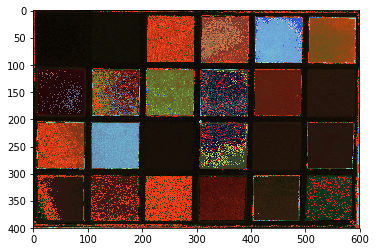

In [238]:
plt.figure()
plt.imshow(im)
plt.show()